In [1]:
import cdflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
path = 'DATA/omni_hro_1min_20100101_v01.cdf'
cdflib.cdf_to_xarray(path)

<xarray.Dataset>
Dimensions:         (Epoch: 44640)
Coordinates:
  * Epoch           (Epoch) float64 6.343e+13 6.343e+13 ... 6.343e+13 6.343e+13
Data variables: (12/46)
    YR              (Epoch) int32 2010 2010 2010 2010 ... 2010 2010 2010 2010
    Day             (Epoch) int32 1 1 1 1 1 1 1 1 1 ... 31 31 31 31 31 31 31 31
    HR              (Epoch) int32 0 0 0 0 0 0 0 0 0 ... 23 23 23 23 23 23 23 23
    Minute          (Epoch) int32 0 1 2 3 4 5 6 7 8 ... 52 53 54 55 56 57 58 59
    IMF             (Epoch) int32 51 51 51 51 51 51 51 ... 71 71 71 71 71 71 71
    PLS             (Epoch) int32 51 51 51 51 51 51 51 ... 71 71 71 71 71 71 71
    ...              ...
    AU_INDEX        (Epoch) int32 3 3 3 3 3 3 3 3 3 ... 26 24 29 30 28 25 25 25
    SYM_D           (Epoch) int32 -1 -1 -1 -1 -1 -1 -1 ... -3 -3 -3 -3 -3 -3 -3
    SYM_H           (Epoch) int32 1 1 1 1 1 1 1 1 1 ... -6 -6 -6 -6 -6 -6 -5 -5
    ASY_D           (Epoch) int32 10 10 9 9 9 9 8 7 ... 14 14 14 14 14 15 15 15
    ASY_H           (Epoch) int32 10 10 10 10 10 11 11 ... 20 20 20 20 21 21 21
    PC_N_INDEX      (Epoch) float32 0.01 0.01 0.01 0.01 ... 0.91 0.93 0.93 0.95
Attributes: (12/27)
    Project:                     NSSDC
    Discipline:                  Space Physics>Interplanetary Studies
    Source_name:                 OMNI (1AU IP Data)>Merged 1 minute Interplan...
    Data_type:                   HRO>Definitive 1minute
    Descriptor:                  IMF and Plasma data
    Data_version:                1
    ...                          ...
    LINK_TEXT:                   ['Additional information for all parameters ...
    LINK_TITLE:                  ['OMNI Data documentation', "SPDF's OMNIWeb ...
    HTTP_LINK:                   ['https://omniweb.gsfc.nasa.gov/html/HROdocu...
    alt_logical_source:          Combined_OMNI_1AU-MagneticField-Plasma-HRO_1...
    Mission_group:               ['OMNI (Combined 1AU IP Data; Magnetic and S...
    spase_DatasetResourceID:     spase://VSPO/NumericalData/OMNI/PT1M

In [53]:
cdf_file = cdflib.CDF(path)
X = ['BX_GSE', 'BY_GSM', 'BZ_GSM', 'flow_speed', 'Vx', 'Vy', 'Vz', 'proton_density', 'T', 'Pressure']
tmp = []
for x in X:
    tmp.append(cdf_file[x])
tmp = np.array(tmp)

In [54]:
from datetime import datetime


a = cdflib.cdfepoch.unixtime(cdf_file['Epoch'])
date = [datetime.utcfromtimestamp(aa) for aa in a]
df = pd.DataFrame(tmp.T, columns=X, index=date)

In [92]:
df

,BX_GSE,BY_GSM,BZ_GSM,flow_speed,Vx,Vy,Vz,proton_density,T,Pressure
2010-01-01 00:00:00,0.02,2.98,0.38,283.200012,-283.000000,9.700000,0.700000,3.85,24931.0,0.62
2010-01-01 00:01:00,0.13,2.99,0.26,283.200012,-283.000000,9.700000,0.700000,3.85,24931.0,0.62
2010-01-01 00:02:00,0.14,2.99,0.40,283.899994,-283.700012,10.200000,-5.200000,3.92,24931.0,0.63
2010-01-01 00:03:00,0.04,2.97,0.54,283.899994,-283.700012,10.200000,-5.300000,3.92,24931.0,0.63
2010-01-01 00:04:00,0.07,3.02,0.32,283.799988,-283.600006,9.600000,-4.100000,4.02,25005.0,0.65
...,...,...,...,...,...,...,...,...,...,...
2010-01-31 23:55:00,1.27,-3.88,-1.36,355.100006,-350.299988,-24.200001,-52.599998,5.67,26541.0,1.43
2010-01-31 23:56:00,0.45,-4.21,-1.64,364.500000,-360.799988,-24.200001,-45.500000,6.66,20534.0,1.77
2010-01-31 23:57:00,0.44,-4.33,-1.54,370.700012,-367.600006,-24.299999,-40.900002,7.31,16565.0,2.01
2010-01-31 23:58:00,0.44,-4.22,-1.49,366.399994,-362.799988,-24.600000,-45.099998,6.69,25299.0,1.80


<AxesSubplot: >

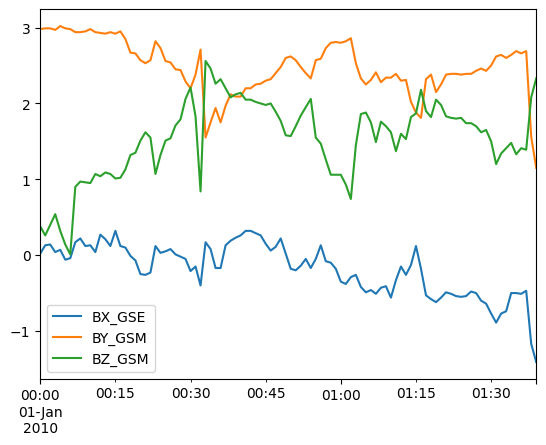

In [56]:
df[['BX_GSE', 'BY_GSM', 'BZ_GSM']][:100].plot()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

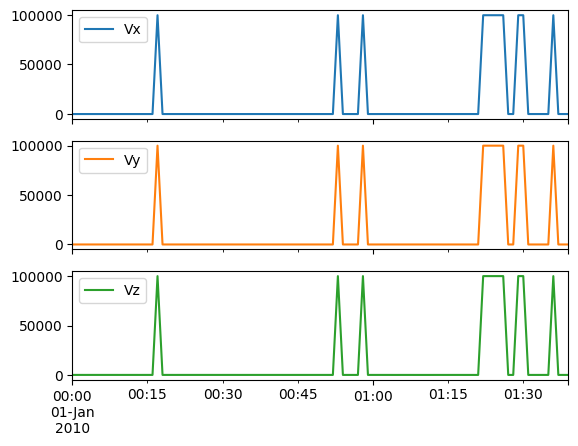

In [57]:
df[['Vx', 'Vy', 'Vz']][:100].plot(subplots=True)

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

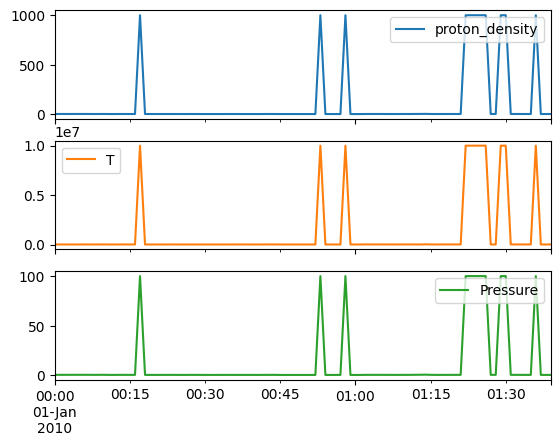

In [58]:
df[['proton_density', 'T', 'Pressure']][:100].plot(subplots=True)

In [89]:
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import MinMaxScaler

class MyDataset(Dataset):
    def __init__(self, train_df, window_size):
        super().__init__()

        scaler = MinMaxScaler()
        x = scaler.fit_transform(train_df)

        
        self.train_array = x
        self.date = train_df.index
        self.input_size = len(train_df)
        self.window_size = window_size
        
    def __len__(self):
        return self.input_size
    
    def __getitem__(self, index):
        return self.train_array[index : index+self.window_size]
        

In [6]:
import cdflib
from datetime import datetime
import numpy as np
import pandas as pd
import os



# 太陽風データファイルのパスを取得
def get_file_path():
    file_lis = []
    for year in range(2010, 2015):
        dir = f'DATA/solar_wind/{year}/'
        files = os.listdir(dir)
        tmp = [dir+f for f in files if os.path.isfile(os.path.join(dir, f))]
        tmp = sorted(tmp)
        file_lis.extend(tmp)
    return file_lis

def load_data(path, df):
    # cdfファイル読み込み
    cdf_file = cdflib.CDF(path)
    # 説明変数
    X = ['BX_GSE', 'BY_GSM', 'BZ_GSM', 'flow_speed', 'Vx', 'Vy', 'Vz', 'proton_density', 'T', 'Pressure']
    tmp = []
    for x in X:
        tmp.append(cdf_file[x])
    tmp = np.array(tmp)
    # 時間
    epoch = cdflib.cdfepoch.unixtime(cdf_file['Epoch'])
    date = [datetime.utcfromtimestamp(e) for e in epoch]

    df_tmp = pd.DataFrame(tmp.T, columns=X)
    df_tmp['date'] = date

    return pd.concat([df, df_tmp])

paths = get_file_path()

df = pd.DataFrame()
for path in paths:
    df_tmp = load_data(path, df)
    df = df_tmp
# df = df[df.flow_speed != 99999.898438]
df = df.reset_index(drop=True)
df.to_csv('DATA/solar_wind/solar_wind_data.csv')


# 欠損値処理

In [52]:
df = pd.read_csv('DATA/solar_wind_data.csv', parse_dates=["date"], index_col=False)
df.drop(['Unnamed: 0', 'date'], axis=1, inplace=True)

In [53]:
X = df.columns
V = [9999.99, 9999.99, 9999.99, 99999.9, 99999.9, 99999.9, 99999.9, 999.99, 9999999.0, 99.99]

In [55]:
for x, v in zip(X, V):
    df[x].replace(v, np.nan, inplace=True)

In [64]:
flag_nan = lambda x: 1 if x else 0
df['nan'] = df.isna().any(axis=1).apply(flag_nan)

In [65]:
df = df.interpolate()
df.isnull().any()

BX_GSE            False
BY_GSM            False
BZ_GSM            False
flow_speed        False
Vx                False
Vy                False
Vz                False
proton_density    False
T                 False
Pressure          False
nan               False
dtype: bool